In [14]:
#Libraries whic we have used 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 


In [15]:
df = pd.read_csv('C:\\IMP\\github\\ML_Lab_T3_63\\CIA_PROJECT\\csvdata.csv')
df.head()

,Index,City,Price,Area,Location,No. of Bedrooms
0,0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,3,Bangalore,8358000,1675,Doddanekundi,3
4,4,Bangalore,6845000,1670,Kengeri,3


In [16]:
print(df)

       Index       City     Price  Area                         Location  \
0          0  Bangalore  30000000  3340                 JP Nagar Phase 1   
1          1  Bangalore   7888000  1045       Dasarahalli on Tumkur Road   
2          2  Bangalore   4866000  1179  Kannur on Thanisandra Main Road   
3          3  Bangalore   8358000  1675                     Doddanekundi   
4          4  Bangalore   6845000  1670                          Kengeri   
...      ...        ...       ...   ...                              ...   
29130   7714     Mumbai  14500000  1180                   Mira Road East   
29131   7715     Mumbai  14500000   530                     Naigaon East   
29132   7716     Mumbai   4100000   700                         Shirgaon   
29133   7717     Mumbai   2750000   995                   Mira Road East   
29134   7718     Mumbai   2750000  1020                   Mira Road East   

       No. of Bedrooms  
0                    4  
1                    2  
2           

In [17]:
#shape method will show us the dimension of the dataset

df.shape

(29135, 6)

In [18]:
#Data Preprocessing
#Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 2
Integer variables: 0
Float variables: 0


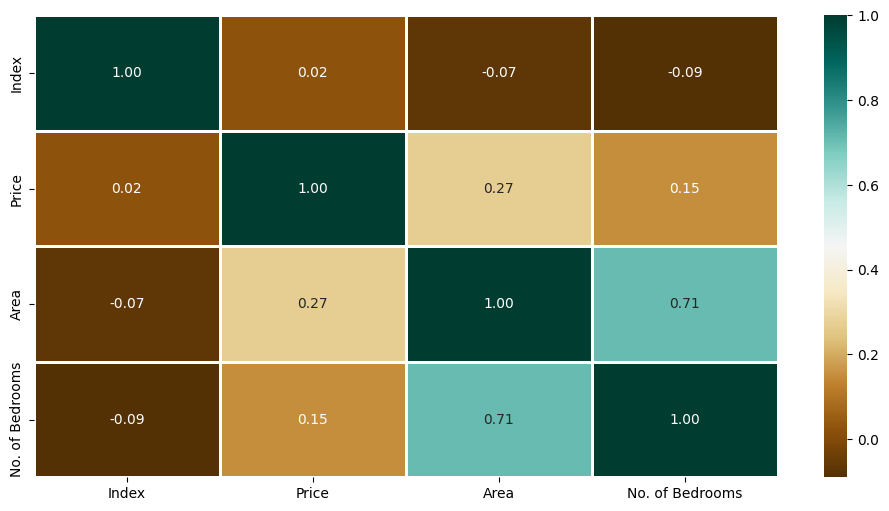

In [19]:
# Exploratory Data Analysis
# EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

# So here let’s make a heatmap using seaborn library.


# Remove non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

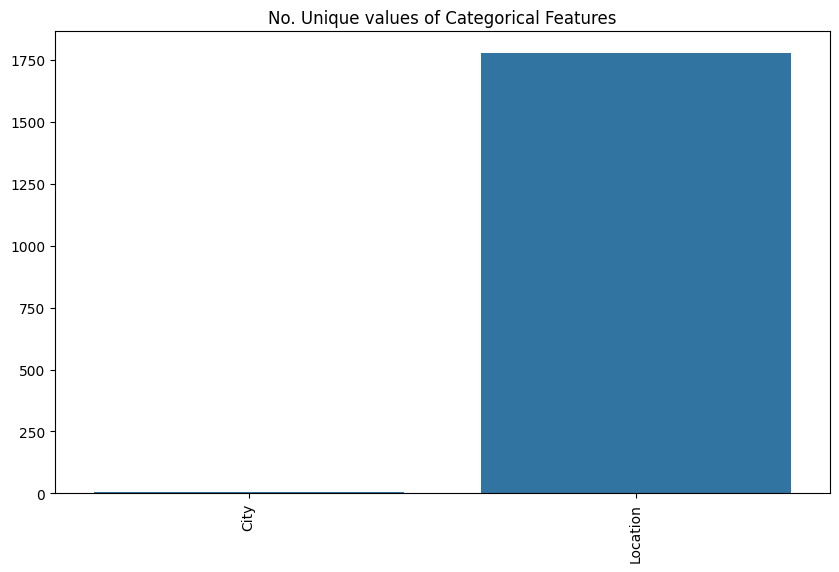

In [20]:
#To analyze the different categorical features. Let’s draw the barplot.

unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


In [21]:
#deleted the column index 

df.drop(['Index'],
             axis=1,
             inplace=True)

In [22]:
#Replacing Price empty values with their mean values to make the data distribution symmetric.

df['Price'] = df['Price'].fillna(
df['Price'].mean())


In [23]:
#Drop records with null values (as the empty records are very less).

new_df = df.dropna()

In [24]:
#Checking features which have null values in the new dataframe (if there are still any).

new_df.isnull().sum()

City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64